#### import

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#### read & load dataset

In [27]:
marketing = pd.read_csv(
    filepath_or_buffer='marketing.csv',
    parse_dates=['date_served', 'date_subscribed', 'date_canceled']
)

In [28]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [29]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


In [30]:
def conversion_rate(dataframe, column_names):
    """
    Doc String
    """
    # conversion rate = total_converted / total_users
    
    total_converted = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    total_users = dataframe.groupby(column_names)['user_id'].nunique()
    
    conversion_rate = total_converted / total_users
    conversion_rate = round(conversion_rate*100, 2)
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    
    # Unstack and convert to pd.DataFrame
    conversion_rate = conversion_rate.unstack(1)
    
    return conversion_rate

In [46]:
conversion_rate(marketing, ['date_served', ''])

variant,control,personalization
date_served,,
2018-01-01,1.28,16.35
2018-01-02,1.16,16.83
2018-01-03,7.87,12.36
2018-01-04,9.55,11.84
2018-01-05,12.72,11.84
2018-01-06,11.88,10.53
2018-01-07,15.97,12.03
2018-01-08,11.66,11.26
2018-01-09,14.29,10.53


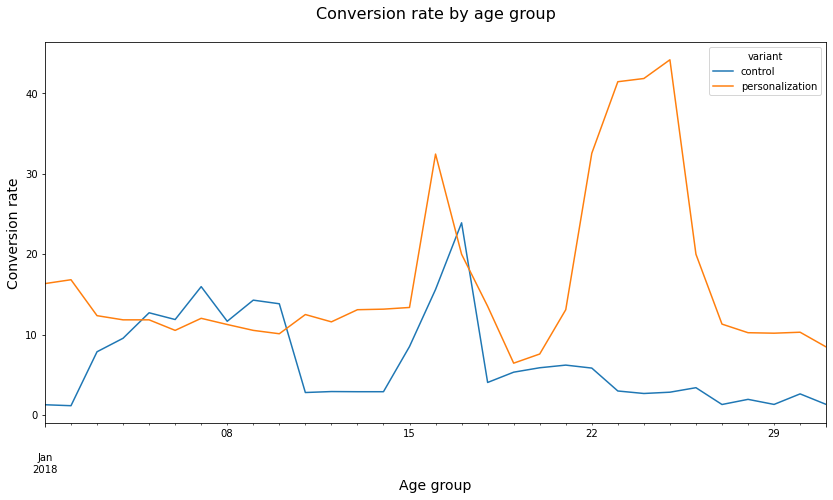

In [47]:
conversion_rate(marketing, ['date_served', 'variant']).plot()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 7)
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

In [21]:
def retention_rate(dataframe, column_names):
    """
    Doc String
    """
    # retention rate = total_retained / total_subscribed
    
    total_retained = dataframe[dataframe['is_retained'] == True].groupby(column_names)['user_id'].nunique()
    total_converted = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    
    retention_rate = (total_retained / total_converted)
    
    # Fill missing values with 0
    retention_rate = retention_rate.fillna(0)
    
    # Unstack and convert to pd.DataFrame
    retention_rate = retention_rate.unstack(1)
    
    return retention_rate

In [49]:
retention_rate(marketing, ['date_served', 'variant'])

variant,control,personalization
date_served,,
2018-01-01,10.500000,1.029412
2018-01-02,16.500000,1.685714
2018-01-03,3.142857,1.363636
2018-01-04,1.529412,0.555556
2018-01-05,1.227273,0.666667
2018-01-06,1.473684,0.687500
2018-01-07,1.173913,0.562500
2018-01-08,1.105263,0.764706
2018-01-09,1.304348,0.500000


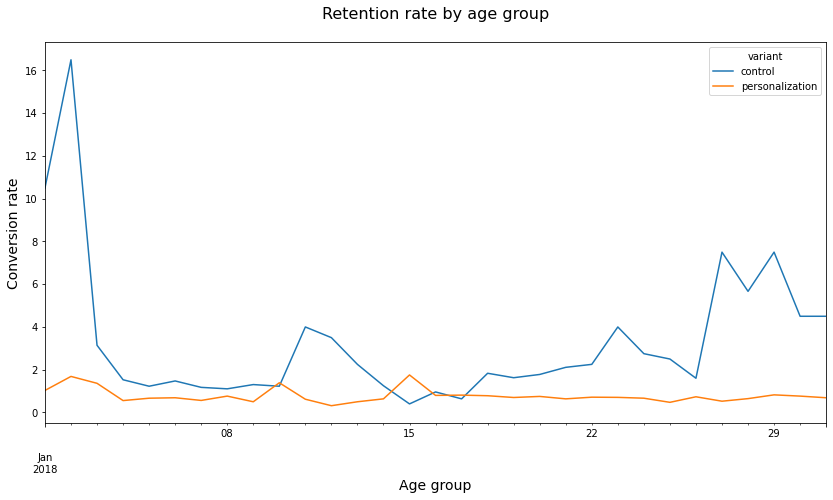

In [51]:
retention_rate(marketing, ['date_served', 'variant']).plot()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 7)
plt.title('Retention rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()